# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Задачи проекта:  
1. Ответьте на вопрос и обоснуйте решение.  
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?  
a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  
2. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.  
3. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.  

Описание данных:  
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.  
Целевой признак: количество страховых выплат клиенту за последние 5 лет.  

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
data.duplicated().sum()

153

In [7]:
# количество дубликатов составляет 3% от гашей выборки, удалим их.
data = data.drop_duplicates().reset_index(drop=True)

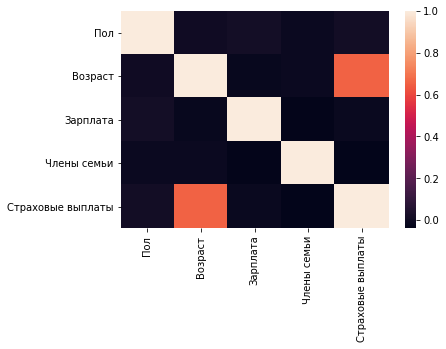

In [8]:
sns.heatmap(data.corr())

In [9]:
data['Возраст'].corr(data['Страховые выплаты'])

0.6549641033747963

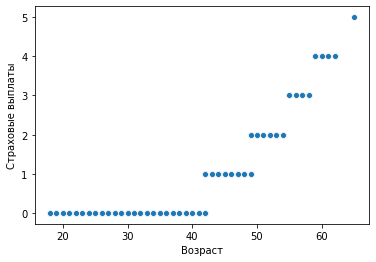

In [10]:
sns.scatterplot(data=data, x='Возраст', y='Страховые выплаты')

In [11]:
def plot(title, column, type_plot, color):
    sns.set()
    if type_plot == 1:
        fig, ax = plt.subplots(figsize=(7, 3))
        sns.countplot(x=column, data=data, palette=color)
    else:
        fig, ax = plt.subplots(figsize=(20, 5))
        sns.distplot(data[column], color=color, bins=len(data[column].unique()))
    ax.set_title(title)
    plt.ylabel('Частота')

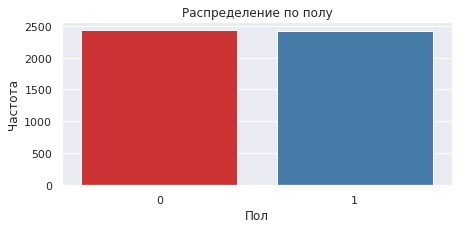

In [12]:
plot('Распределение по полу', 'Пол', 1, 'Set1')

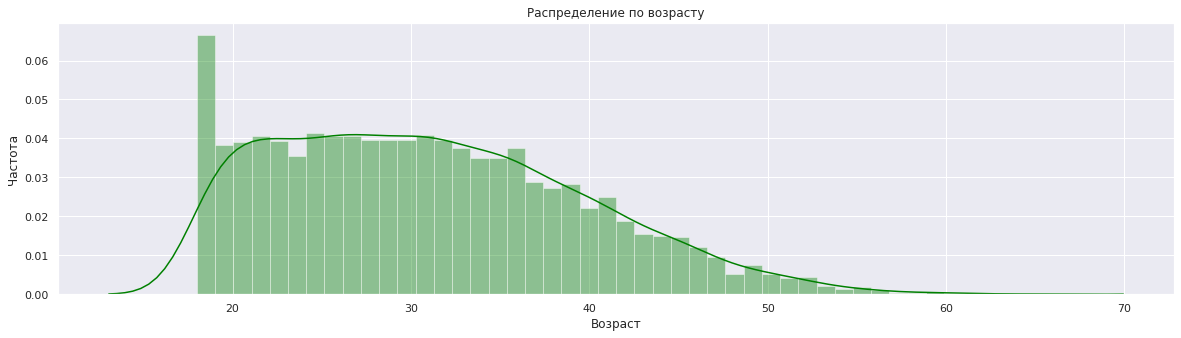

In [13]:
plot('Распределение по возрасту', 'Возраст', 2, 'green')

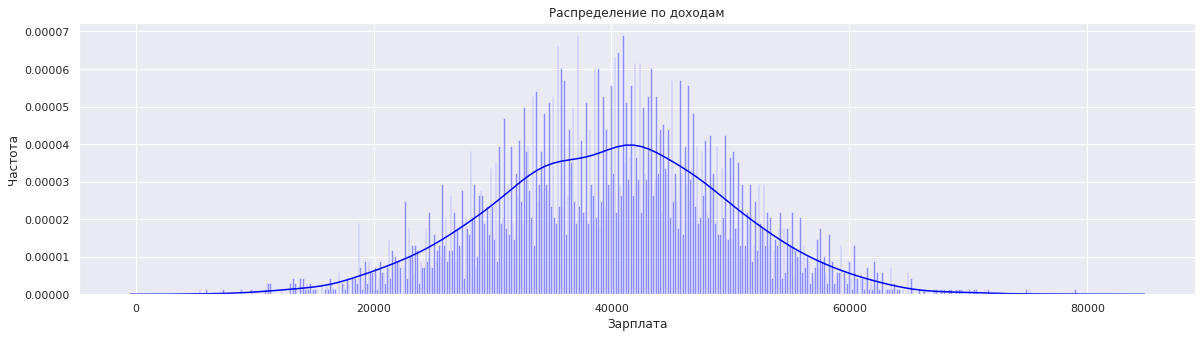

In [14]:
plot('Распределение по доходам', 'Зарплата', 2, 'blue')

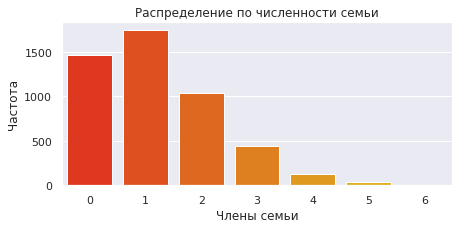

In [15]:
plot('Распределение по численности семьи', 'Члены семьи', 1, 'autumn')

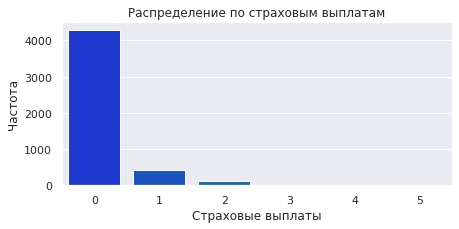

In [16]:
plot('Распределение по страховым выплатам', 'Страховые выплаты', 1, 'winter')

**Пропусков в данных нет, выбивающихся значений то же.  
Имелось 153 явных дубликата (3% от выборки) - избавились от них.  
Есть зависимость между возрастом заемщиков и количеством выплат - с возрастом растет.  
Имеется выброс по столбцу "Возраст", однако можно предположить, что это особенность нашиего набора данных**

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?  
  
**Ответ:** Не изменится.

**Обоснование:**  

Представим новую матрицу признаков X1 как произведение старой X на обратимую матрицу P:  
$$
X^1 = XP
$$

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
  
Наша новая формула обучения будет:  
$$
w^1 = ((XP)^T (XP))^{-1} (XP)^T y \tag{1}
$$
  
Раскроем скобки:  
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
$$
w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
  
Так как: $ w = (X^T X)^{-1} X^T y $, а так же (так как P обратимая): $ (P^T )^{-1} P^T = E $. То:
$$
w^1 = P^{-1} w
$$
  
Подставим новое значение вектора весов в формулу предсказания:  
$$
a^1 = X^1 w^1 = XP P^{-1} w
$$
  
Так как матрица P обратима, то:
$$
a^1 = Xw = a
$$
  
А следовательно качество линейной регрессии останется неизменным

**Обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказательство:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
$$
w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

## Алгоритм преобразования

**Алгоритм**  
Алгоритмом преобразования будет матрица со случайными величинами, у которой существует обратная к ней матрица. 

**Обоснование**

Так как мы доказали в предыдущем пункте, что качество линейной регрессии при этом не изменится результаты метрик должны совпать.

In [17]:
target = data['Страховые выплаты']
features = data.drop(['Страховые выплаты'], axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

In [18]:
mfeatures_train = features_train.values
mfeatures_test = features_test.values

In [19]:
#создаем случайную матрицу 4х4 по количеству признаков основной матрицы
random_matrix = np.random.randn(4, 4)
random_matrix

array([[-0.15168697, -2.06110468,  0.17368374, -1.4379943 ],
       [ 0.52414266,  2.35251238, -0.5712239 ,  0.2314349 ],
       [ 0.27068223, -1.15381714,  0.60882987, -0.5903381 ],
       [-0.86510369,  0.22979861,  0.86798369,  0.6905024 ]])

In [20]:
#проверим новую матрицу на обратимость. Матрица будет обратимой, если мы в результате вычислений получим единичную матрицу
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1.,  0., -0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [-0.,  0., -0.,  1.]])

In [21]:
new_features_train = mfeatures_train @ random_matrix
new_features_test = mfeatures_test @ random_matrix

## Проверка алгоритма

In [22]:
model = LinearRegression()
model.fit(mfeatures_train, target_train)
predicted_norm = model.predict(mfeatures_test)
r2_1 = model.score(mfeatures_test, target_test)

In [23]:
model.fit(new_features_train, target_train)
predicted_encoded = model.predict(new_features_test)
r2_2 = model.score(new_features_test, target_test)

In [24]:
print('R2 базовой матрицы: ', round(r2_1, 5))
print('R2 преобразованой матрицы: ', round(r2_2, 5))

R2 базовой матрицы:  0.41605
R2 преобразованой матрицы:  0.41605


**Модели показали одинаковые результаты как с проебразованием , так и без преобразования.
Это означает, что алгоритм работает.**